In [51]:
#EEGデータのパス
filepath = "/Users/yamamotokouhei/実験データ/1day/EEG_grasping_09-Dec-2020_kei_sub1-3.mat"

In [52]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [53]:
# dataクラス
class O_Data:
    def __init__(self, eeg, index, label):
        self.eeg = eeg
        self.index = index
        self.label = label
        self.stack = []

    def push(self, item):
        self.stack.append(item)

def Standardization(data): #標準化
    after_data = scipy.stats.zscore(data)
    b = np.average(after_data)
    c = np.var(after_data)
    return after_data

o_data65 = list()


In [54]:
# 変数など
data_directry = ''
file_num = 1

trial_num = 30
all_trial = (file_num) * trial_num
all_d = 0
CH = 64
#EEGデータ
#for s in range(file_num):
#とりあえず1データでICAできるかどうか
Dictionary = scipy.io.loadmat(filepath)
for t in range(trial_num):
    for i, key in enumerate(Dictionary.keys()):
        if i > 2:
            a = Dictionary[key]
            b = a[0, t][0][0]
            eeg = b[0][0:65, :]
            index = b[1]
            samplerate = b[2]
            label = 0

            o_data = O_Data(eeg, index, label)
            o_data65.append(o_data)

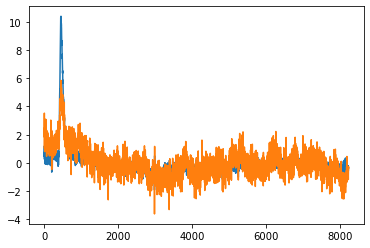

In [55]:
for n in range(1):  # all_trial
    number = list()  # restのindex
    time = list()
    all_d = sum(len(v) for v in o_data65[n].index) - 1
    for i in range(all_d + 1):
        time.append(i)
    eeg = o_data65[n].eeg  # トライアルnのeeg
    index = o_data65[n].index  # トライアルnのindex
    label = o_data65[n].label  # トライアルnのlabel
    for i in range(all_d):
        if index[:, i] == 0:
            number.append(i)
    rest_time = len(number)  # rest時間のindex数

    # 眼電の設定
    onech_eeg1 = Standardization(eeg[64, :])  # 一つのチャンネルのeeg
    onech_eeg2 = Standardization(eeg[3, :])  # 一つのチャンネルのeeg
    number = np.array(number)
    time = np.array(time)

    plt.plot(time,onech_eeg1,onech_eeg2)
    

In [56]:
Y = np.vstack([onech_eeg1, onech_eeg2]).T

ica = FastICA(n_components=2, whiten=True)
ica.fit(Y)

FastICA(n_components=2)

In [57]:
X = ica.transform(Y)
x1 = np.array(X.T[0,:])
x2 = np.array(X.T[1,:])

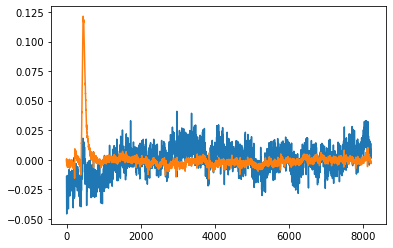

In [58]:
plt.plot(time,x1,x2)


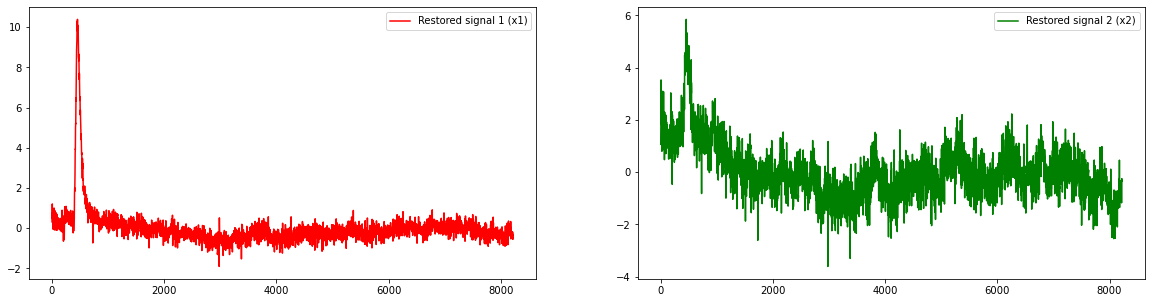

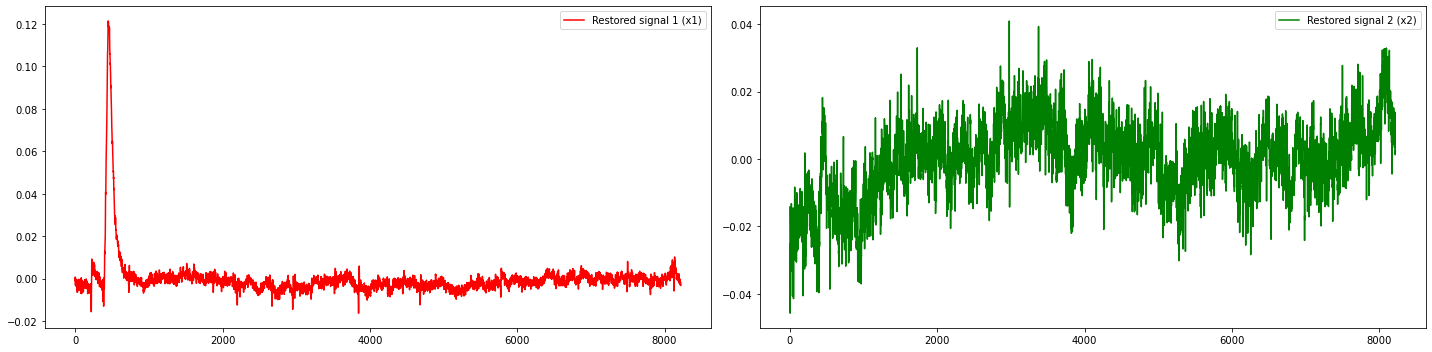

In [63]:
fig1 = plt.figure(figsize=(20, 5))
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
ax1.plot(time, onech_eeg1, color="red", label="Restored signal 1 (x1)")
ax2.plot(time, onech_eeg2, color="green", label="Restored signal 2 (x2)")
ax1.legend(loc = 'upper right') 
ax2.legend(loc = 'upper right') 
fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(time, x2, color="red", label="Restored signal 1 (x1)")
ax2.plot(time, x1, color="green", label="Restored signal 2 (x2)")
ax1.legend(loc = 'upper right') 
ax2.legend(loc = 'upper right') 
fig.tight_layout()
plt.show()
